DataSet: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

In [179]:
import pandas as pd
import numpy as np
from sklearn import tree

In [180]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [181]:
df = pd.read_csv('master.csv')

In [182]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [184]:
# dropping 'HDI for year' column, cause less than a half of the overall data has this feature.
df = df.drop(['HDI for year'], axis=1)

In [185]:
df.shape

(27820, 11)

In [186]:
df.info() # Will get rid of useless columns, such as 'sex', 'age' etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 2.3+ MB


In [187]:
# Just double-checking if there is any missing data
df.dropna(how='any', inplace=True)
df.shape

(27820, 11)

In [188]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [189]:
df.describe() #taking a closer look at the data before changing it

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


In [190]:
df.describe(include=['object', 'bool'])

,country,sex,age,country-year,gdp_for_year ($),generation
count,27820,27820,27820,27820,27820,27820
unique,101,2,6,2321,2321,6
top,Austria,male,25-34 years,Nicaragua2011,"306,125,173,853",Generation X
freq,382,13910,4642,12,12,6408


In [191]:
first_half = df.groupby(['country', 'year'])['suicides_no', 'population'].sum()

In [192]:
first_half

suicides_no  population
country             year                         
Albania             1987           73     2709600
                    1988           63     2764300
                    1989           68     2803100
                    1992           47     2822500
                    1993           73     2807300
                    1994           50     2849300
                    1995           88     2903400
                    1996           89     2940200
                    1997          170     2977300
                    1998          154     3012700
                    1999          139     3029700
                    2000           54     2796300
                    2001          119     2799349
                    2002          133     2818839
                    2003          124     2843929
                    2004          146     2874991
                    2005            0     2783320
                    2006            0     2780176
                    2007          124     2770344
                    2008          160     2757059
                    2009            0     2745735
                    2010           96     2736025
Antigua and Barbuda 1985            0       62574
                    1986            0       61270
                    1987            0       60261
                    1988            0       59564
                    1989            0       59238
                    1990            1       59334
                    1991            0       60394
                    1992            0       61741
...                               ...         ...
Uruguay             2007          576     3087957
                    2008          523     3100791
                    2009          511     3114306
                    2010          547     3127306
                    2012          599     3151939
                    2013          546     3164670
                    2014          591     3177645
                    2015          630     3190795
Uzbekistan          1990         1459    17165700
                    1991         1393    17347800
                    1992         1344    18257000
                    1993         1355    18509300
                    1994         1419    19144700
                    1995         1485    19599000
                    1996         1699    19854500
                    1997         1554    20364300
                    1998         1620    20861200
                    1999         1795    21329916
                    2000         1919    21789067
                    2001         1914    22231527
                    2002         1576    22632256
                    2003         1416    22982883
                    2004         1251    23300841
                    2005         1221    23600347
                    2009         1399    25288102
                    2010         1464    25651783
                    2011         1640    25978049
                    2012         1835    26381830
                    2013         1950    26838924
                    2014         2095    27313507

[2321 rows x 2 columns]

In [193]:
df[[' gdp_for_year ($) ', 'gdp_per_capita ($)']].corr() # extremely correlated feaures. Bravely drop one of them

,gdp_per_capita ($)
gdp_per_capita ($),1.0


In [194]:
second_half = df.groupby(['country', 'year'])['population', 'gdp_per_capita ($)'].mean()

In [195]:
second_half.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2321 entries, (Albania, 1987) to (Uzbekistan, 2014)
Data columns (total 2 columns):
population            2321 non-null float64
gdp_per_capita ($)    2321 non-null float64
dtypes: float64(2)
memory usage: 42.0+ KB


In [196]:
df = first_half

In [197]:
df.insert(loc=len(df.columns), column='gdp_per_capita ($)', value=second_half['gdp_per_capita ($)']) 

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2321 entries, (Albania, 1987) to (Uzbekistan, 2014)
Data columns (total 3 columns):
suicides_no           2321 non-null int64
population            2321 non-null int64
gdp_per_capita ($)    2321 non-null float64
dtypes: float64(1), int64(2)
memory usage: 60.1+ KB


In [199]:
df.reset_index(inplace=True) # 'country' and 'year' columns became multiindex. Getting them back

In [200]:
df.head()

,country,year,suicides_no,population,gdp_per_capita ($)
0,Albania,1987,73,2709600,796.0
1,Albania,1988,63,2764300,769.0
2,Albania,1989,68,2803100,833.0
3,Albania,1992,47,2822500,251.0
4,Albania,1993,73,2807300,437.0


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 5 columns):
country               2321 non-null object
year                  2321 non-null int64
suicides_no           2321 non-null int64
population            2321 non-null int64
gdp_per_capita ($)    2321 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 90.7+ KB


In [202]:
df['suicides / 1k pop'] = (df['suicides_no'] / df['population']) * 1000 # making our target column

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000C19AC0E9E8>,
      dtype=object)

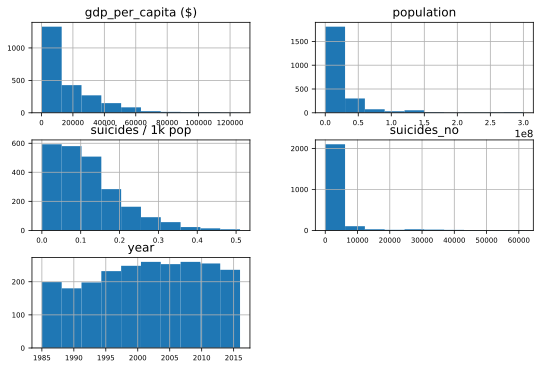

In [203]:
df.hist(figsize=(9, 6), xlabelsize=7, ylabelsize=7)

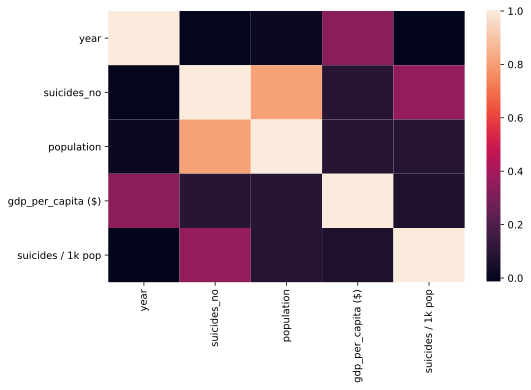

In [204]:
sns.heatmap(df.corr()) # let's find out if correlation matrix could tell us smth

it seems that 'year' does not affect our target value.

In [205]:
country_values = df['country'].unique() # making a new feature out of 'country' that would acceptable for regression models

In [206]:
countries = {}
n = 1
for country in country_values:
    countries[country] = n
    n += 1

In [207]:
df['country_id'] = df['country'].map(countries)

In [208]:
df.head()

,country,year,suicides_no,population,gdp_per_capita ($),suicides / 1k pop,country_id
0,Albania,1987,73,2709600,796.0,0.026941,1
1,Albania,1988,63,2764300,769.0,0.022791,1
2,Albania,1989,68,2803100,833.0,0.024259,1
3,Albania,1992,47,2822500,251.0,0.016652,1
4,Albania,1993,73,2807300,437.0,0.026004,1


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 7 columns):
country               2321 non-null object
year                  2321 non-null int64
suicides_no           2321 non-null int64
population            2321 non-null int64
gdp_per_capita ($)    2321 non-null float64
suicides / 1k pop     2321 non-null float64
country_id            2321 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 127.0+ KB


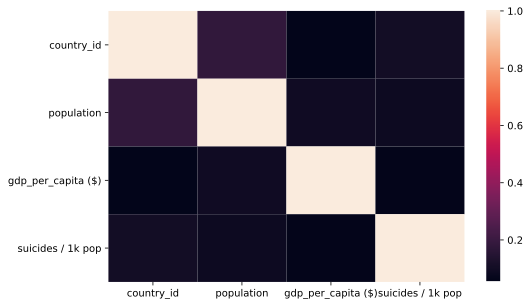

In [210]:
sns.heatmap(df[['country_id', 'population', 'gdp_per_capita ($)', 'suicides / 1k pop']].corr())

In [211]:
X = df[['country_id', 'population', 'gdp_per_capita ($)']]
y = df[['suicides / 1k pop']]

In [212]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [213]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

# Bagging Regressor

In [214]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [215]:
dt_reg = DecisionTreeRegressor()

In [216]:
bag_dt = BaggingRegressor(dt_reg)

In [217]:
param_grid = dict(max_depth=range(1,6), min_samples_leaf=range(1, 6))

In [218]:
grid_search = GridSearchCV(dt_reg, param_grid, cv=5, scoring = 'neg_mean_squared_error')

In [219]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 6), 'min_samples_leaf': range(1, 6)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [220]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 2}

In [221]:
-grid_search.best_score_

0.006344101848976498

In [222]:
dt_reg = DecisionTreeRegressor(max_depth=5, min_samples_leaf=3)

In [223]:
bag_score = -cross_val_score(bag_dt, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

# Random Forest Regressor

In [224]:
from sklearn.ensemble import RandomForestRegressor

In [225]:
rf_reg = RandomForestRegressor()

In [226]:
parameters = dict(n_estimators=[5, 10], max_depth=range(1,6), bootstrap=['True', 'False'])

In [227]:
grid_search = GridSearchCV(estimator = rf_reg,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 5)

In [228]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 10], 'max_depth': range(1, 6), 'bootstrap': ['True', 'False']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [229]:
grid_search.best_params_

{'bootstrap': 'True', 'max_depth': 5, 'n_estimators': 10}

In [230]:
rf_score = -grid_search.best_score_
rf_score

0.005271300787050849

# Linear Regression

In [231]:
from sklearn.linear_model import LinearRegression

In [232]:
lr = LinearRegression()

In [233]:
lr_score = -cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
lr_score

0.007862595029668

# k Nearest Neighbors Regression

In [234]:
from sklearn.neighbors import KNeighborsRegressor

In [235]:
knn_reg = KNeighborsRegressor()

In [236]:
param_grid = dict(n_neighbors=range(1,11), weights=['uniform', 'distance'])

In [237]:
grid_search = GridSearchCV(knn_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

In [238]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 11), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [239]:
grid_search.best_params_

{'n_neighbors': 8, 'weights': 'uniform'}

In [240]:
knn_score = -grid_search.best_score_

In [241]:
knn_score

0.005757608860866052

# Comparing models' accuracy

In [242]:
best_score = [('Bagging', bag_score), ('RandomForest', rf_score), ('LinearRegression', lr_score), 
                  ('KNearestNeighbors', knn_score)]
best_score.sort(key=lambda x: x[1])
best_score

[('Bagging', 0.000722725049534019),
 ('RandomForest', 0.005271300787050849),
 ('KNearestNeighbors', 0.005757608860866052),
 ('LinearRegression', 0.007862595029668)]

# Creating an ensemble of models

First things first. Trainig each of our model

In [243]:
bag_dt.fit(X_train, y_train)
bagging = bag_dt.predict(X_test)


In [244]:
rf_reg.fit(X_train, y_train)
random_forest = rf_reg.predict(X_test)

In [245]:
lr.fit(X_train, y_train)
linear_regression = lr.predict(X_test)

In [246]:
knn_reg.fit(X_train, y_train)
kNearestNeighbors = knn_reg.predict(X_test)

Now we have to make a dataframe out of our models' predictions

In [248]:
random_forest_ = np.reshape(random_forest, (581, 1)) # making these arrays onedimensional
bagging_ = np.reshape(bagging, (581, 1))

In [249]:
bagging_ = pd.Series(list(bagging_))
random_forest_ = pd.Series(list(random_forest_))
linear_regression = pd.Series(list(linear_regression))
kNearestNeighbors = pd.Series(list(kNearestNeighbors))
true_values = pd.Series(list(np.array(y_test)))

In [250]:
ensemble = pd.DataFrame({'bagging':bagging_, 'random_forest':random_forest_,
                        'linear_regression':linear_regression, 'kNearestNeighbors':kNearestNeighbors,
                        'true_values': true_values})

In [251]:
ensemble['bagging'] = ensemble['bagging'].astype('float64')
ensemble['random_forest'] = ensemble['random_forest'].astype('float64')
ensemble['linear_regression'] = ensemble['linear_regression'].astype('float64')
ensemble['kNearestNeighbors'] = ensemble['kNearestNeighbors'].astype('float64')
ensemble['true_values'] = ensemble['true_values'].astype('float64')

Final step. Initiate our new model that will have been trained on its predecessors' predictions

In [252]:
ensemble_reg = LinearRegression()

In [253]:
X = ensemble[['bagging', 'random_forest', 'linear_regression', 'kNearestNeighbors']]
y = ensemble['true_values']

In [254]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.25)

In [255]:
ensemble_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [256]:
predicted = ensemble_reg.predict(X_test)

In [257]:
mean_squared_error(predicted, y_test)

0.0008954280508216561